@attribute Gender {Female,Male}
@attribute Age numeric
@attribute Height numeric
@attribute Weight numeric
@attribute family_history_with_overweight {yes,no}
@attribute FAVC {yes,no}
@attribute FCVC numeric
@attribute NCP numeric
@attribute CAEC {no,Sometimes,Frequently,Always}
@attribute SMOKE {yes,no}
@attribute CH2O numeric
@attribute SCC {yes,no}
@attribute FAF numeric
@attribute TUE numeric
@attribute CALC {no,Sometimes,Frequently,Always}
@attribute MTRANS {Automobile,Motorbike,Bike,Public_Transportation,Walking}
@attribute NObeyesdad {Insufficient_Weight,Normal_Weight,Overweight_Level_I,Overweight_Level_II,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III}

In [2]:
import os
os.getcwd()

'c:\\Users\\arunk\\Assignments\\ASSESSMENT COMPLETION\\Machine_learning_Assessment\\Answer_2'

In [143]:
import pandas as pd

df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [144]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [146]:
df.nunique()

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [188]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


# Define the bin edges and labels
bin_edges = [0, 18, 30, 40, 50, 100]
bin_labels = [1, 2, 3, 4, 5]

# Create a new column 'Age_Group' with the binned values
df['Age_Group'] = pd.cut(df['Age'], bins=bin_edges, labels=bin_labels, right=False)

# Check the distribution of the Age_Group feature
age_group_counts = df['Age_Group'].value_counts()
print(age_group_counts)


Age_Group
2    1634
3     301
1     113
4      53
5      10
Name: count, dtype: int64


In [179]:
X_numerical = df.select_dtypes(exclude="O")
X_text = df.select_dtypes(include="O")
X_text.drop(columns=["NObeyesdad"], inplace=True)
y = df["NObeyesdad"]

In [182]:
X_text_train, X_text_test, X_numerical_train, X_numerical_test, y_train, y_test = train_test_split(X_text, X_numerical, y, test_size=0.2, random_state=42)

encoder = OneHotEncoder(sparse=False,drop="first")
scalar = RobustScaler()

# Preprocess the text features using one-hot encoding
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_text_train_encoded = encoder.fit_transform(X_text_train)
X_text_test_encoded = encoder.transform(X_text_test)

# Preprocess the numerical featuers using robustscalar
X_numerical_train_scaled = scaler.fit_transform(X_numerical_train)
X_numerical_test_scaled = scaler.transform(X_numerical_test)

# Combine one-hot encoded text features with numerical features
X_train_encoded = np.hstack((X_text_train_encoded, X_numerical_train_scaled))
X_test_encoded = np.hstack((X_text_test_encoded, X_numerical_test_scaled))


c:\Users\arunk\anaconda3\envs\FraudDetection\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


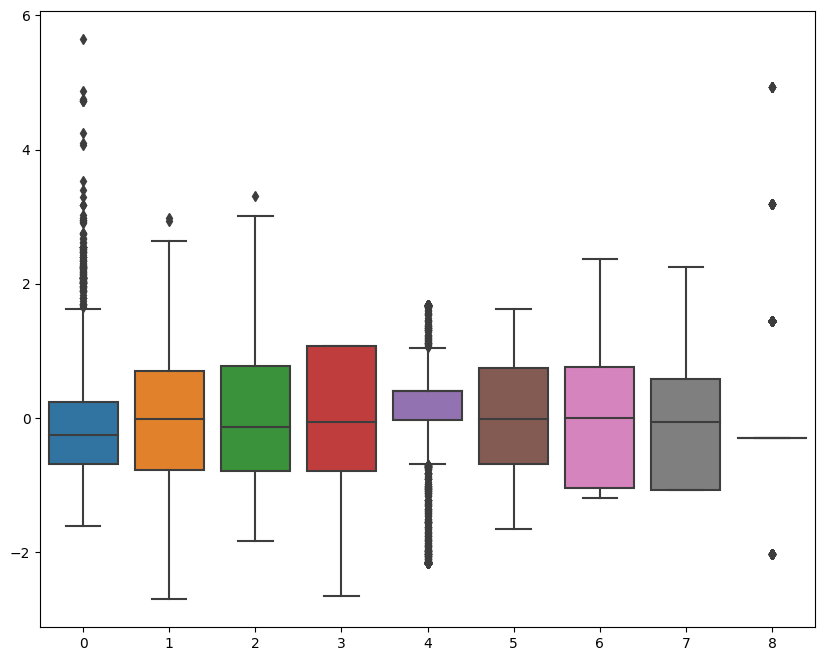

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.boxplot(data=X_numerical_train_scaled)
plt.show()


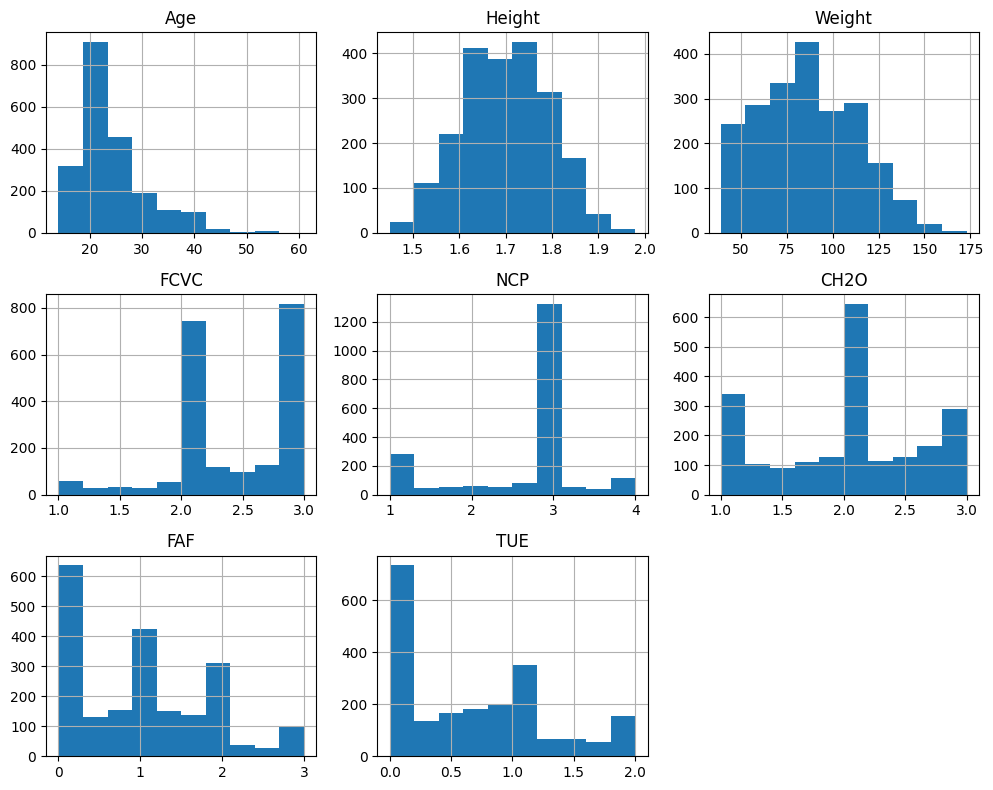

In [184]:
import matplotlib.pyplot as plt

df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


In [191]:
# Decision Tree Classifier
svm_clf = SVC()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()

clfs = [svm_clf, dt_clf, rf_clf, lr_clf]

for clf in clfs:
    clf.fit(X_train_encoded, y_train)
    y_pred = clf.predict(X_test_encoded)

    print(f"classifier: {clf.__class__.__name__}")
    print(f"Classification report:\n{classification_report(y_test,y_pred)}")

classifier: SVC
Classification report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.96      0.96        56
      Normal_Weight       0.84      0.85      0.85        62
     Obesity_Type_I       0.96      0.92      0.94        78
    Obesity_Type_II       0.93      0.98      0.96        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.82      0.82      0.82        56
Overweight_Level_II       0.90      0.88      0.89        50

           accuracy                           0.92       423
          macro avg       0.92      0.92      0.92       423
       weighted avg       0.92      0.92      0.92       423

classifier: DecisionTreeClassifier
Classification report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.98      0.95        56
      Normal_Weight       0.90      0.89      0.89        62
     Obesity_Type_I       0.95      0.94     

c:\Users\arunk\anaconda3\envs\FraudDetection\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
